# Problem Statement

# Perform sentimental analysis:
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweets = pd.read_csv(r"/content/Elon_musk.csv",encoding='cp1252')
tweets

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

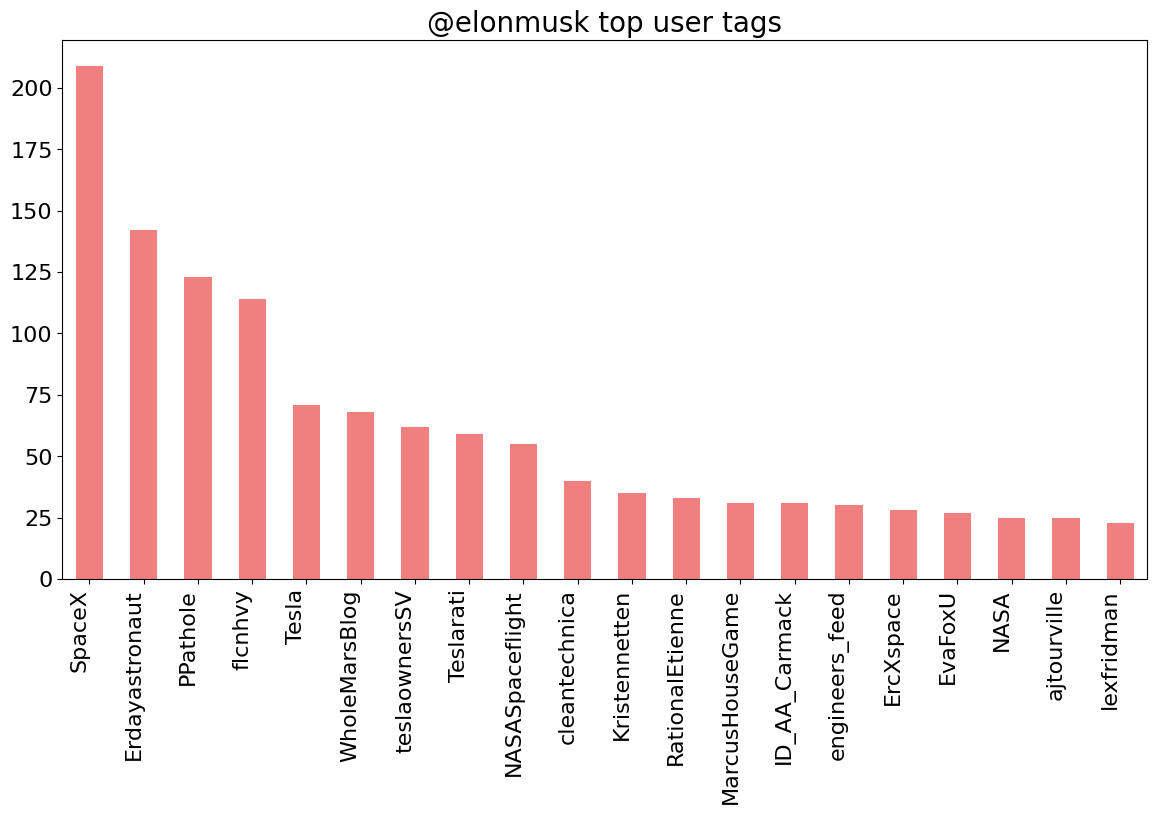

In [4]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

# BasicText Preprocessing
Cleaning the text by removing irrelevant information

In [5]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

Text
0                                         im an alien
1   idaacarmack ray tracing on cyberpunk with hdr ...
2                    joerogan spotify great interview
3                              doge is underestimated
4   teslacn congratulations tesla china for amazin...
5                           happy new year of the ox 
6   frodo was the underdoge\nall thought he would ...
7                    owensparks flcnhvy  haha thanks 
8   flcnhvy  indeed tweets definitely do not repre...
9    the most entertaining outcome is the most likely
10                        givedirectly just sent some

# Word Frequency

In [6]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

# Removing Stopwords


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [9]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
dtype: int64

# Basic Feature Extaction
Count vectoriser tells the frequency of a word.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(tweets["Text"])
feature_names = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({
    'term': feature_names,
    'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()
})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

word_freq_df.head(11)


term  occurrences  frequency
0         aber            1   0.000076
1         able            6   0.000453
2          abo            1   0.000076
3       aboard            1   0.000076
4        abort            3   0.000227
5      absence            1   0.000076
6     absolute            1   0.000076
7   absolutely           15   0.001133
8       absorb            1   0.000076
9   absorption            1   0.000076
10      absurd            2   0.000151

# TFIDF - Term frequency inverse Document Frequencyt

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()

dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=names_features)
df


able  abort  absolutely  access  accurate  actual  actually  adamklotz  \
0      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
2      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
3      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
4      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
...    ...    ...         ...     ...       ...     ...       ...        ...   
1994   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1995   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1996   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1997   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1998   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   

      add  adding  ...  yeah      year  years  yes  yesterdays  youre  \
0     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
2     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
3     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
4     0.0     0.0  ...   0.0  0.356742    0.0  0.0         0.0    0.0   
...   ...     ...  ...   ...       ...    ...  ...         ...    ...   
1994  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1995  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1996  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1997  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1998  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   

      yourfavgas  yup  zero  zone  
0            0.0  0.0   0.0   0.0  
1            0.0  0.0   0.0   0.0  
2            0.0  0.0   0.0   0.0  
3            0.0  0.0   0.0   0.0  
4            0.0  0.0   0.0   0.0  
...          ...  ...   ...   ...  
1994         0.0  0.0   0.0   0.0  
1995         0.0  0.0   0.0   0.0  
1996         0.0  0.0   0.0   0.0  
1997         0.0  0.0   0.0   0.0  
1998         0.0  0.0   0.0   0.0  

[1999 rows x 1000 columns]

# N-gram

# Bi-gram

In [12]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [13]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

Bi-gram  Freq
0                 rt spacex    71
1             spacex falcon    17
2     erdayastronaut spacex    16
3               pretty much    12
4                   rt nasa    12
5              waemd spacex    11
6               giga berlin    10
7               first stage    10
8   teslaratiteam teslarati    10
9               nasa spacex     9
10             falcon first     9

# Bi-gram plot

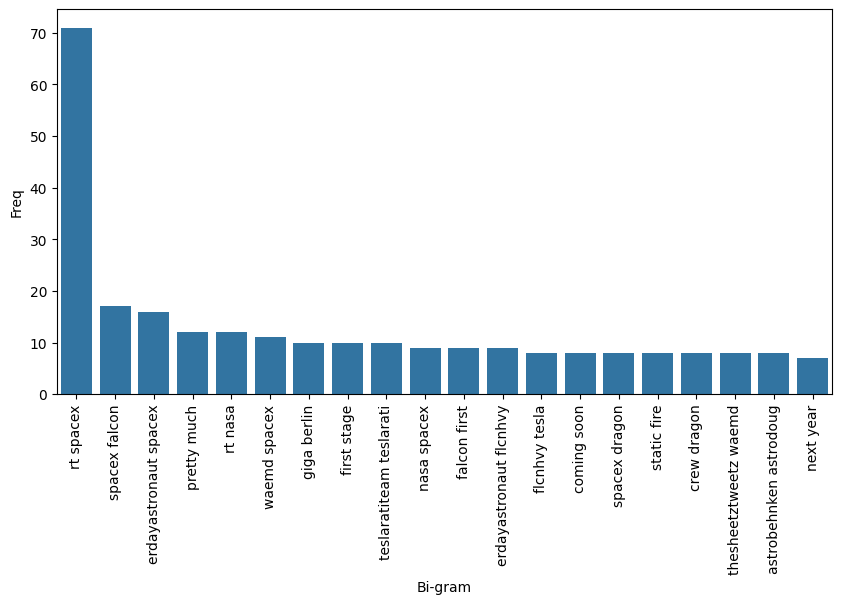

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-gram

In [15]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [16]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

Tri-gram  Freq
0                        rt spacex falcon    17
1                      falcon first stage     9
2                     spacex falcon first     8
3            thesheetztweetz waemd spacex     8
4                       course still love     7
5          ppathole thesheetztweetz waemd     7
6             waemd spacex spacexstarlink     7
7                      first stage landed     6
8                       rt spacex liftoff     6
9   spacex spacexstarlink wanationalguard     6
10    spacex felixschlang marcushousegame     5

# Tri-gram plot

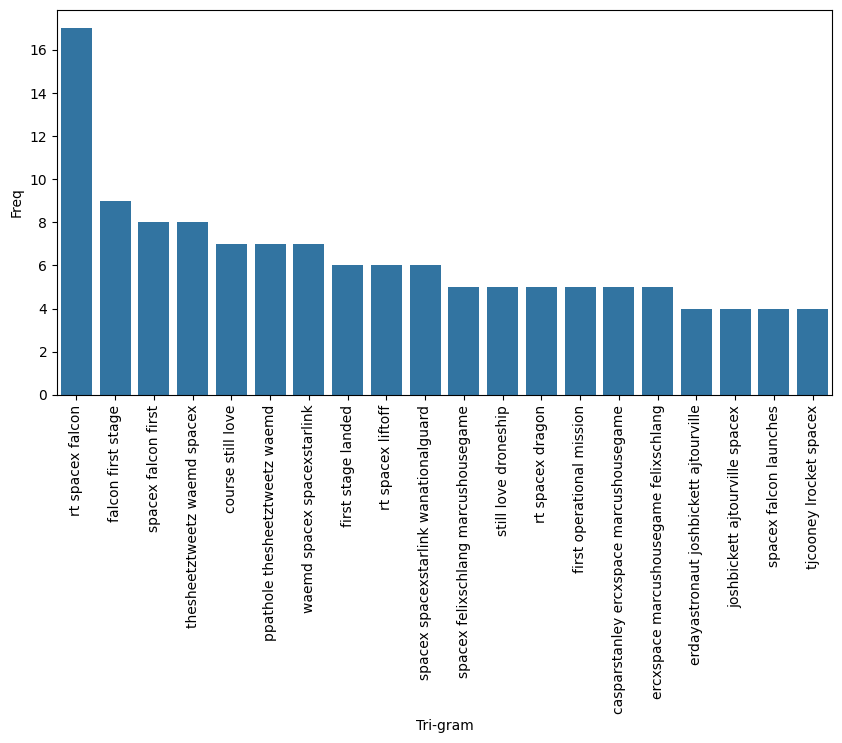

In [17]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating a Worlcloud

In [18]:
string_Total = " ".join(tweets["Text"])

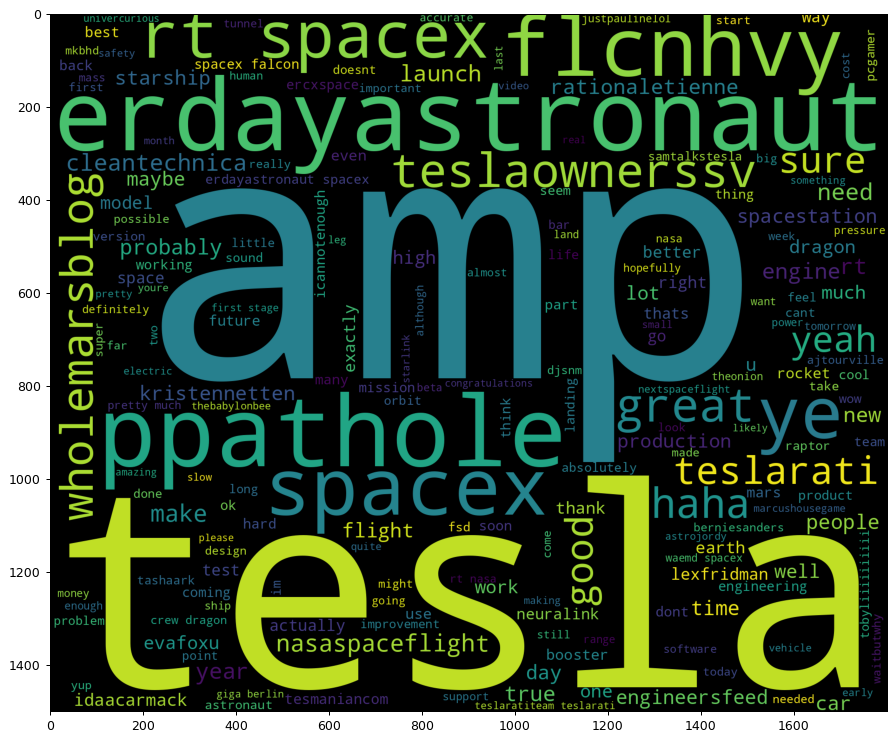

In [19]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Subjectivity and Polarity

In [20]:
!pip install textblob


In [21]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [22]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

Text  subjectivity  polarity
0                                            im alien      0.750000 -0.250000
1   idaacarmack ray tracing cyberpunk hdr nextleve...      0.000000  0.000000
2                    joerogan spotify great interview      0.750000  0.800000
3                                 doge underestimated      0.000000  0.000000
4   teslacn congratulations tesla china amazing ex...      0.322222  0.200000
5                                   happy new year ox      0.727273  0.468182
6   frodo underdoge thought would fail httpstcozgx...      0.300000 -0.500000
7                      owensparks flcnhvy haha thanks      0.250000  0.200000
8   flcnhvy indeed tweets definitely represent rea...      0.500000  0.000000
9                         entertaining outcome likely      0.850000  0.250000
10                                  givedirectly sent      0.000000  0.000000

# Creating a Worlcloud

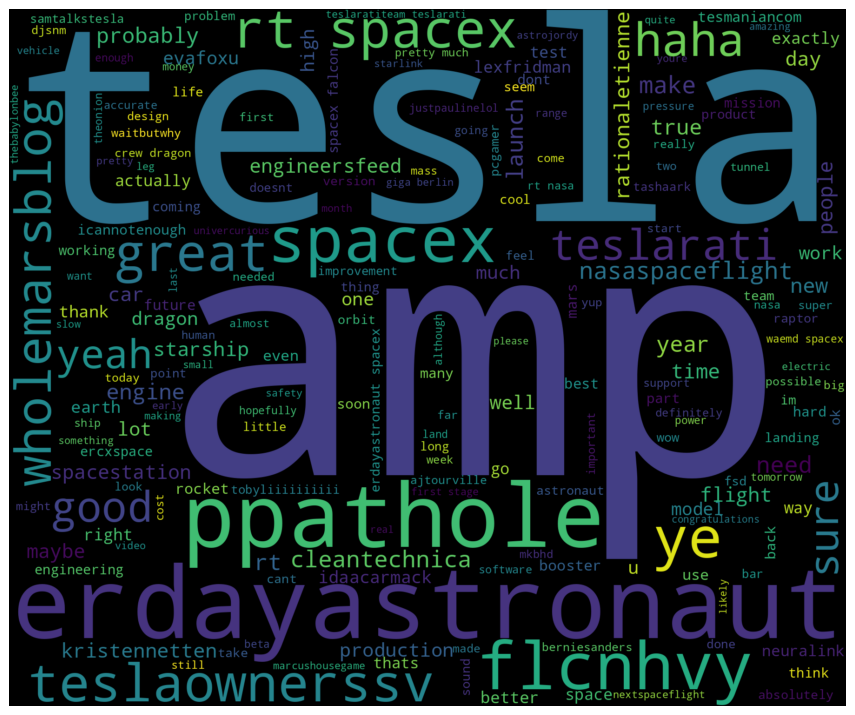

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [24]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [25]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [26]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


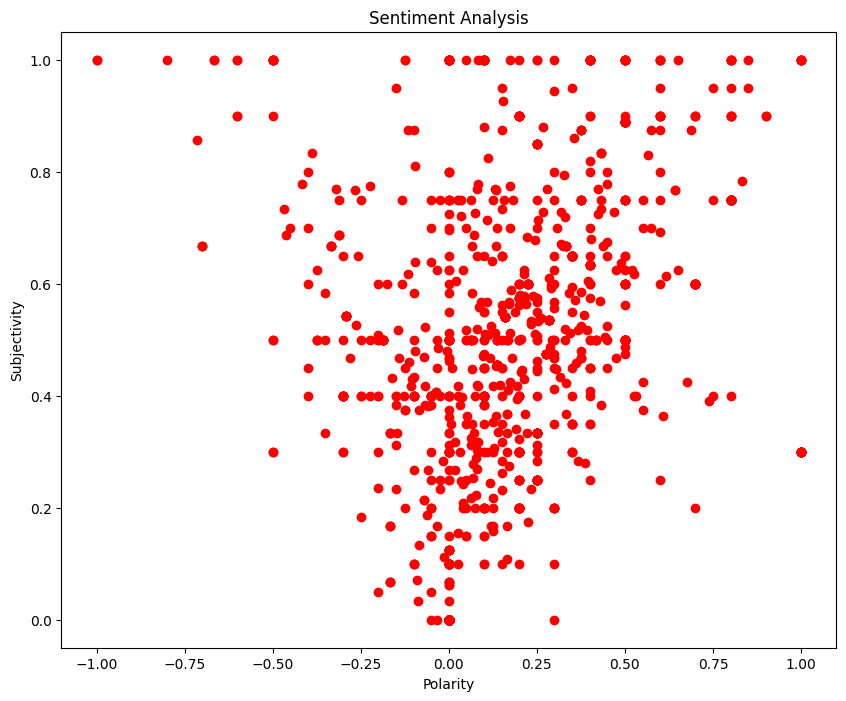

In [27]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [28]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

# Perform sentimental analysis:

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [29]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [30]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [31]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [32]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [33]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [34]:
df = pd.DataFrame(reviewlist)
df

Title  Rating  \
0    5.0 out of 5 stars\nI am satisfied with this p...     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                     5.0 out of 5 stars\nNice product     5.0   
3                     5.0 out of 5 stars\nNice product     5.0   
4    3.0 out of 5 stars\nGood build quality & displ...     3.0   
..                                                 ...     ...   
105         4.0 out of 5 stars\nRecharging with magnet     4.0   
106     5.0 out of 5 stars\nVery good value for money.     5.0   
107  4.0 out of 5 stars\nIt's real experience with ...     4.0   
108                     4.0 out of 5 stars\nNice watch     4.0   
109                4.0 out of 5 stars\nAwesome product     4.0   

                                                Review  \
0    I am using smart watch for the first time. Mod...   
1    This smart (model Boat extend plus) watch is f...   
2    Looks so good... Easy to use. Charging fast. C...   
3    Very good ,nice and worth for money, super pro...   
4    Skipping the parts mostly covered in other rev...   
..                                                 ...   
105  Recharging with that magnet can be a nightmare...   
106                         Very good value for money.   
107                                                      
108  It is very nice watch working properly price r...   
109                    Good product, value for money..   

                               Review_Date  
0        Reviewed in India on 2 March 2024  
1      Reviewed in India on 27 August 2023  
2        Reviewed in India on 6 March 2024  
3        Reviewed in India on 5 March 2024  
4       Reviewed in India on 9 August 2022  
..                                     ...  
105  Reviewed in India on 28 November 2023  
106   Reviewed in India on 3 February 2024  
107  Reviewed in India on 24 November 2023  
108  Reviewed in India on 18 November 2023  
109  Reviewed in India on 22 November 2023  

[110 rows x 4 columns]

In [35]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [36]:
df.head(50)

Title  Rating  \
0   5.0 out of 5 stars\nI am satisfied with this p...     5.0   
1                   4.0 out of 5 stars\nGood product.     4.0   
2                    5.0 out of 5 stars\nNice product     5.0   
3                    5.0 out of 5 stars\nNice product     5.0   
4   3.0 out of 5 stars\nGood build quality & displ...     3.0   
5   4.0 out of 5 stars\nGood watch for all but req...     4.0   
6                    5.0 out of 5 stars\nVery awesome     5.0   
7               4.0 out of 5 stars\nBettary life good     4.0   
8             3.0 out of 5 stars\nNOt worth the money     3.0   
9               5.0 out of 5 stars\nBest Budget watch     5.0   
10  5.0 out of 5 stars\nI am satisfied with this p...     5.0   
11                  4.0 out of 5 stars\nGood product.     4.0   
12                   5.0 out of 5 stars\nNice product     5.0   
13                   5.0 out of 5 stars\nNice product     5.0   
14  3.0 out of 5 stars\nGood build quality & displ...     3.0   
15  4.0 out of 5 stars\nGood watch for all but req...     4.0   
16                   5.0 out of 5 stars\nVery awesome     5.0   
17              4.0 out of 5 stars\nBettary life good     4.0   
18            3.0 out of 5 stars\nNOt worth the money     3.0   
19              5.0 out of 5 stars\nBest Budget watch     5.0   
20  4.0 out of 5 stars\nGood budget smart watch wi...     4.0   
21                   4.0 out of 5 stars\nGood Product     4.0   
22                     4.0 out of 5 stars\nGood watch     4.0   
23             4.0 out of 5 stars\nIts a good product     4.0   
24  4.0 out of 5 stars\nEverything is very good ex...     4.0   
25                        4.0 out of 5 stars\nPerfect     4.0   
26                     4.0 out of 5 stars\nOk product     4.0   
27           4.0 out of 5 stars\nBest in the market..     4.0   
28                4.0 out of 5 stars\nValue for money     4.0   
29               4.0 out of 5 stars\nGood smart watch     4.0   
30                        4.0 out of 5 stars\nGeneral     4.0   
31                           4.0 out of 5 stars\nGood     4.0   
32  4.0 out of 5 stars\nGood watch wake gaster is ...     4.0   
33  4.0 out of 5 stars\nValue for money and go for...     4.0   
34                      4.0 out of 5 stars\nQualified     4.0   
35                      4.0 out of 5 stars\nGud watch     4.0   
36              4.0 out of 5 stars\nLove the colour .     4.0   
37        4.0 out of 5 stars\nGood or bad for product     4.0   
38         4.0 out of 5 stars\nOverall A Good Product     4.0   
39                      4.0 out of 5 stars\nGood work     4.0   
40                4.0 out of 5 stars\nWorth the penny     4.0   
41            4.0 out of 5 stars\nGood budget product     4.0   
42     4.0 out of 5 stars\nGood product at this price     4.0   
43                           4.0 out of 5 stars\nBest     4.0   
44                      3.0 out of 5 stars\nNot worth     3.0   
45                      4.0 out of 5 stars\nVery Nice     4.0   
46                  4.0 out of 5 stars\nPerfect watch     4.0   
47                  3.0 out of 5 stars\nNot that good     3.0   
48                        3.0 out of 5 stars\nBattery     3.0   
49                         4.0 out of 5 stars\nColour     4.0   

                                               Review        Review_Date  
0   I am using smart watch for the first time. Mod...       2 March 2024  
1   This smart (model Boat extend plus) watch is f...     27 August 2023  
2   Looks so good... Easy to use. Charging fast. C...       6 March 2024  
3   Very good ,nice and worth for money, super pro...       5 March 2024  
4   Skipping the parts mostly covered in other rev...      9 August 2022  
5   My experience with the boAt Xtend Call Plus Sm...        30 May 2023  
6   Good product and also very good packaging very...       6 March 2024  
7   Face pic not allowed in face watch and working...    5 February 2024  
8   Review OverviewAverage2.7The Boat today launch...    

In [37]:
df.to_csv("BoatSmartWatch_Review.csv")

# Load Dataset

In [38]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Title  Rating  \
0    5.0 out of 5 stars\nI am satisfied with this p...     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                     5.0 out of 5 stars\nNice product     5.0   
3                     5.0 out of 5 stars\nNice product     5.0   
4    3.0 out of 5 stars\nGood build quality & displ...     3.0   
..                                                 ...     ...   
105         4.0 out of 5 stars\nRecharging with magnet     4.0   
106     5.0 out of 5 stars\nVery good value for money.     5.0   
107  4.0 out of 5 stars\nIt's real experience with ...     4.0   
108                     4.0 out of 5 stars\nNice watch     4.0   
109                4.0 out of 5 stars\nAwesome product     4.0   

                                                Review        Review_Date  
0    I am using smart watch for the first time. Mod...       2 March 2024  
1    This smart (model Boat extend plus) watch is f...     27 August 2023  
2    Looks so good... Easy to use. Charging fast. C...       6 March 2024  
3    Very good ,nice and worth for money, super pro...       5 March 2024  
4    Skipping the parts mostly covered in other rev...      9 August 2022  
..                                                 ...                ...  
105  Recharging with that magnet can be a nightmare...   28 November 2023  
106                         Very good value for money.    3 February 2024  
107                                                NaN   24 November 2023  
108  It is very nice watch working properly price r...   18 November 2023  
109                    Good product, value for money..   22 November 2023  

[110 rows x 4 columns]

In [39]:
reviews.Rating.describe()

count    110.000000
mean       4.236364
std        0.634299
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [40]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       106 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [41]:
reviews.isna().sum()

Title          0
Rating         0
Review         4
Review_Date    0
dtype: int64

In [42]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

Title  Rating  \
0  5.0 out of 5 stars\nI am satisfied with this p...     5.0   
1                  4.0 out of 5 stars\nGood product.     4.0   
2                   5.0 out of 5 stars\nNice product     5.0   
3                   5.0 out of 5 stars\nNice product     5.0   
4  3.0 out of 5 stars\nGood build quality & displ...     3.0   

                                              Review      Review_Date  
0  I am using smart watch for the first time. Mod...     2 March 2024  
1  This smart (model Boat extend plus) watch is f...   27 August 2023  
2  Looks so good... Easy to use. Charging fast. C...     6 March 2024  
3  Very good ,nice and worth for money, super pro...     5 March 2024  
4  Skipping the parts mostly covered in other rev...    9 August 2022

# Data Visualization
Date vs Review Count

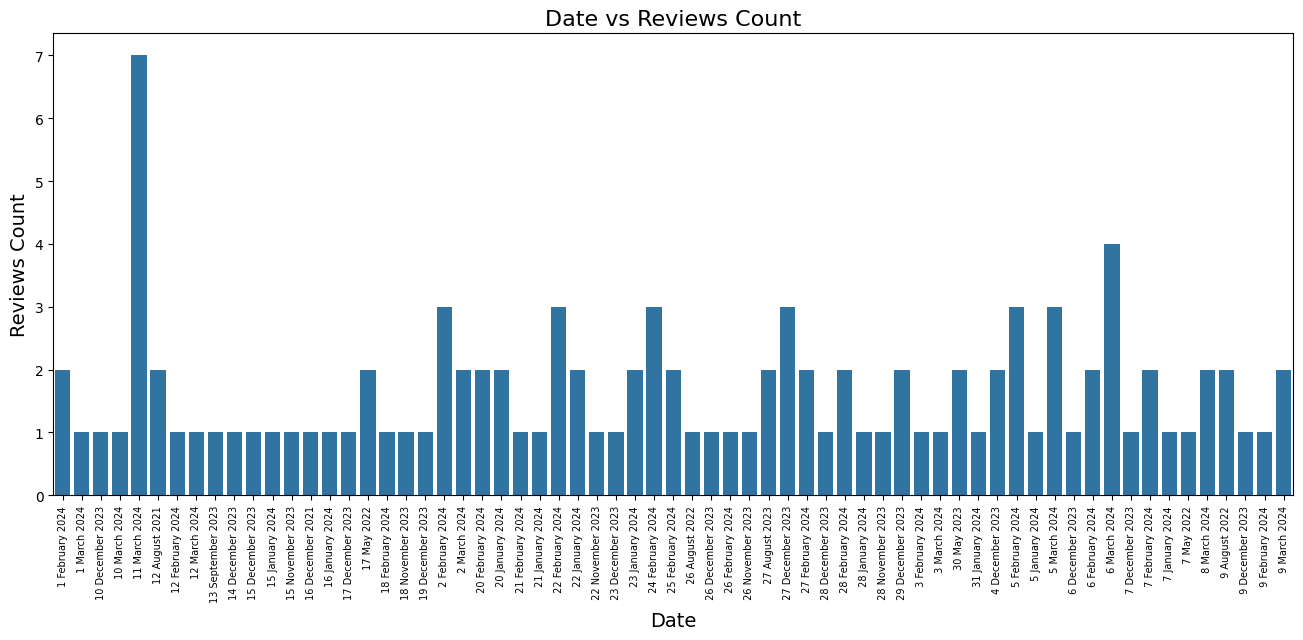

In [43]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

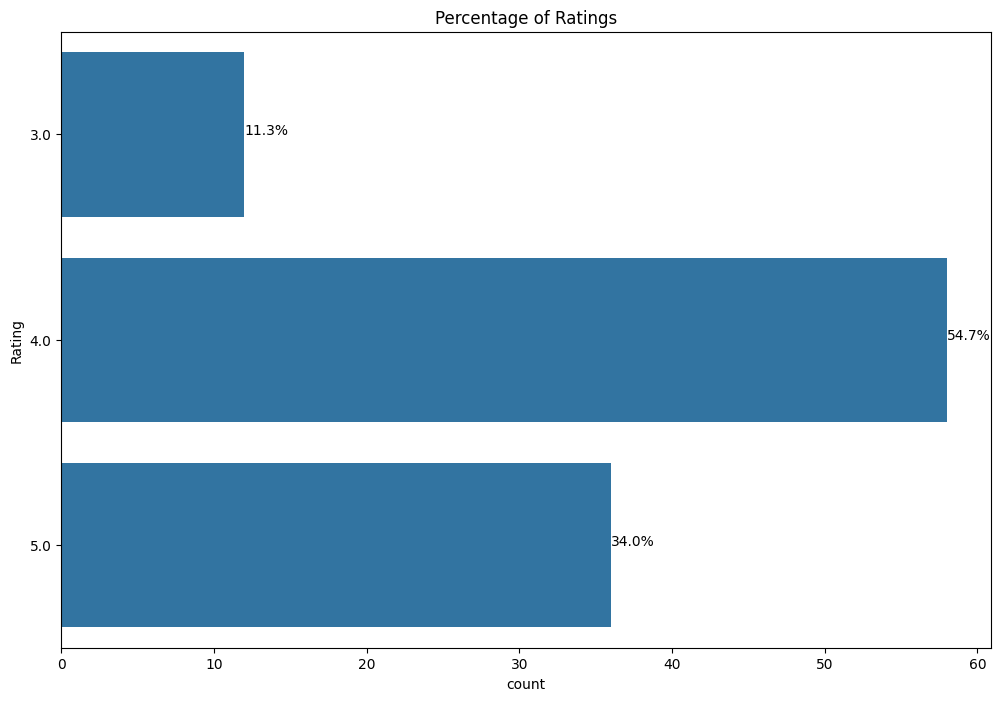

In [44]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing for Sentiment Analysis
Spelling Correction

In [45]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    I am using smart watch for the first time. Mod...
1    His smart (model Coat extend plus) watch is sa...
2    Looks so good... Easy to use. Charging fast. C...
3    Very good ,nice and worth for money, super pro...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [46]:
boat_review = reviews[['Review']]
boat_review

Review
0    I am using smart watch for the first time. Mod...
1    This smart (model Boat extend plus) watch is f...
2    Looks so good... Easy to use. Charging fast. C...
3    Very good ,nice and worth for money, super pro...
4    Skipping the parts mostly covered in other rev...
..                                                 ...
104  The media could not be loaded.\n              ...
105  Recharging with that magnet can be a nightmare...
106                         Very good value for money.
108  It is very nice watch working properly price r...
109                    Good product, value for money..

[106 rows x 1 columns]

# Resetting index

In [47]:
boat_review.reset_index(drop=True, inplace=True)

In [48]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [49]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [50]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/106 [00:00<?, ?it/s]

In [51]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...

# Text Pre-processing Techniques
A. Removing '@names'

In [52]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [53]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

B. Removing links (http | https)

In [54]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

C. Removing Review with empty text

In [55]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

D. Dropping duplicate rows

In [56]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

E. Function to remove emoji

In [57]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [58]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

F. Removing Stop words

In [60]:
with codecs.open(r"/content/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [61]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [62]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  
0  i using smart watch first time. model xtend bo...  
1  this smart (model boat extend plus) watch func...  
2  looks good... easy use. charging fast. charges...  
3         very good ,nice worth money, super product  
4  skipping parts mostly covered reviews sponsore...  
5  my experience boat xtend call plus smart watch...  
6        good product also good packaging impressive  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  the media could loaded. used watch month now.....

G. Tokenize 'Clean_Reviews'

In [63]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [64]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, smart, watch, first, time, model, xten...
1    [smart, model, boat, extend, plus, watch, func...
2    [look, good, easy, use, charging, fast, charge...
3           [good, nice, worth, money, super, product]
4    [skipping, part, mostly, covered, review, spon...
5    [experience, boat, xtend, call, plus, smart, w...
6    [good, product, also, good, packaging, impress...
7    [face, pic, allowed, face, watch, working, bes...
8    [review, overviewaverage, boat, today, launche...
9    [medium, could, loaded, used, watch, month, bo...
Name: Clean_Reviews, dtype: object

In [65]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   
5  experience boat xtend call plus smart watch so...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  medium could loaded used watch month bought fi...   

                                   Uncleaned_Reviews  \
0  i using smart watch first time. model xtend bo...   
1  this smart (model boat extend plus) watch func...   
2  looks good... easy use. charging fast. charges...   
3         very good ,nice worth money, super product   
4  skipping parts mostly covered reviews sponsore...   
5  my experience boat xtend call plus smart watch...   
6        good product also good packaging impressive   
7  face pic allowed face watch working best activ...   
8  review overviewaverage2.7the boat today launch...   
9  the media could loaded. used watch month now.....   

                                   Tokenized_Reviews  
0  [using, smart, watch, first, time, model, xten...  
1  [smart, model, boat, extend, plus, watch, func...  
2  [look, good, easy, use, charging, fast, charge...  
3         [good, nice, worth, money, super, product]  
4  [skipping, part, mostly, covered, review, spon...  
5  [experience, boat, xtend, call, plus, smart, w...  
6  [good, product, also, good, packaging, impress...  
7  [face, pic, allowed, face, watch, working, bes...  
8  [review, overviewaverage, boat, today, launche...  
9  [medium, could, loaded, used, watch, month, bo...

# H. Converting words to Stemmer

In [66]:
stemmer = SnowballStemmer("english")

In [67]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0    use smart watch first time model xtend boat rt...
1    smart model boat extend plus watch function we...
2    look good easi use charg fast charg stay long ...
3                  good nice worth money super product
4    skip part most cover review sponsor yt one add...
..                                                 ...
101  medium could load year use watch qualiti say f...
102  recharg magnet nightmar werabl devic friend op...
103                                    good valu money
104  nice watch work proper price rang nice must bu...
105                            good product valu money

[105 rows x 1 columns]

# I. Converting words to Lemma

In [68]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

stemmed
0    using smart watch first time model xtend boat ...
1    smart model boat extend plus watch functioning...
2    look good easy use charging fast charge stay l...
3                  good nice worth money super product
4    skipping part mostly covered review sponsored ...
..                                                 ...
101  medium could loaded year using watch quality s...
102  recharging magnet nightmare werable device fri...
103                                   good value money
104  nice watch working properly price range nice m...
105                           good product value money

[105 rows x 1 columns]

# Basic Feature Extaction

A. Applying bag of Words without N grams

In [69]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [70]:
print(cv.get_feature_names_out()[109:200])

['benefitsnow' 'best' 'better' 'beyond' 'bezel' 'big' 'bike' 'bip' 'bit'
 'black' 'bloated' 'blood' 'blue' 'bluetooth' 'boat' 'body' 'bother'
 'bought' 'box' 'boyfriend' 'bp' 'bpm' 'brand' 'break' 'breath'
 'breathing' 'bright' 'brightness' 'brings' 'browsing' 'brushed' 'bt'
 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt' 'button'
 'buy' 'buyer' 'buying' 'cable' 'cache' 'calculated' 'calculating'
 'calculation' 'calculator' 'calender' 'call' 'called' 'caller' 'callin'
 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot' 'carddesign' 'care'
 'cart' 'case' 'category' 'catering' 'center' 'centerbefore' 'change'
 'changed' 'charge' 'charger' 'charging' 'charm' 'cheap' 'check' 'checked'
 'checking' 'child' 'childish' 'chinese' 'choice' 'choose' 'claim'
 'claimed' 'classic' 'classy' 'clean' 'clear' 'clearing']


In [71]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'ach' 'ackward' 'acticity'
 'activate' 'activating' 'active' 'activites' 'activity' 'actual'
 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'advanced'
 'advertised' 'aggregate' 'ago' 'alarm' 'alert' 'alexa' 'allowed'
 'allowing' 'almost' 'along' 'also' 'alternative' 'aluminium' 'always'
 'amaze' 'amazfit' 'amazing' 'amazon' 'amoled' 'amount' 'analog' 'android'
 'angle' 'animal' 'animation' 'anniversary' 'another' 'answer' 'anyonefor'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'appeared' 'apple' 'apps' 'appyou'
 'around' 'arre' 'asakte' 'aside' 'asks' 'aspect' 'assistant' 'assisted'
 'atm' 'attached' 'attaching' 'attention' 'attractive' 'audio' 'auto'
 'available' 'average' 'away' 'awesome' 'back' 'background' 'backup' 'bad'
 'b

In [72]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [73]:
dataframe = dataframe.reset_index(drop=True)

In [74]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/105 [00:00<?, ?it/s]

In [75]:
corpus[3]

'good nice worth money super product'

# Applying Countvectorizer (Creating the Bag of Words model)

In [76]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [77]:
X.shape

(105, 1546)

In [78]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support', 'alexa watch'],
      dtype=object)

In [79]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [80]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

accept  access  account  accur  accuraci  accuraci sleep  \
0         0       0        0      0         0               0   
1         0       1        0      0         0               0   
2         0       0        0      0         0               0   
3         0       0        0      0         0               0   
4         1       1        0      0         1               0   
..      ...     ...      ...    ...       ...             ...   
100       0       0        0      0         0               0   
101       0       0        0      0         0               0   
102       0       0        0      0         0               0   
103       0       0        0      0         0               0   
104       0       0        0      0         0               0   

     accuraci sleep track  activ  activ includ  activ step  ...  \
0                       0      0             0           0  ...   
1                       0      1             0           1  ...   
2                       0      0             0           0  ...   
3                       0      0             0           0  ...   
4                       0      6             0           1  ...   
..                    ...    ...           ...         ...  ...   
100                     0      0             0           0  ...   
101                     0      0             0           0  ...   
102                     0      0             0           0  ...   
103                     0      0             0           0  ...   
104                     0      0             0           0  ...   

     would recommend  would recommend go  wrist  xtend  xtend boat  \
0                  0                   0      0      1           1   
1                  0                   0      1      0           0   
2                  0                   0      0      0           0   
3                  0                   0      0      0           0   
4                  0                   0      1      0           0   
..               ...                 ...    ...    ...         ...   
100                0                   0      0      0           0   
101                0                   0      0      0           0   
102                0                   0      0      0           0   
103                0                   0      0      0           0   
104                0                   0      0      0           0   

     xtend call  xtend call plu  xtend smartwatch  xtend watch  ye  
0             0               0                 0            0   0  
1             0               0                 0            0   2  
2             0               0                 0            0   0  
3             0               0                 0            0   0  
4             0               0                 0            0   0  
..          ...             ...               ...          ...  ..  
100           0               0                 0            0   0  
101           0               0                 0            0   0  
102           0               0                 0            0   0  
103           0               0                 0            0   0  
104           0               0                 0            0   0  

[105 rows x 1546 columns]

C. TF-IDF Vectorizer

In [81]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/105 [00:00<?, ?it/s]

In [82]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen go dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen go utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one like 

# Applying TF-IDF Vectorizer

In [83]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [84]:
X.shape

(105, 1546)

In [85]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support', 'alexa watch'],
      dtype=object)

In [86]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [87]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

accept    access  account  accur  accuraci  accuraci sleep  \
0    0.000000  0.000000      0.0    0.0  0.000000             0.0   
1    0.000000  0.036831      0.0    0.0  0.000000             0.0   
2    0.000000  0.000000      0.0    0.0  0.000000             0.0   
3    0.000000  0.000000      0.0    0.0  0.000000             0.0   
4    0.027854  0.024937      0.0    0.0  0.024179             0.0   
..        ...       ...      ...    ...       ...             ...   
100  0.000000  0.000000      0.0    0.0  0.000000             0.0   
101  0.000000  0.000000      0.0    0.0  0.000000             0.0   
102  0.000000  0.000000      0.0    0.0  0.000000             0.0   
103  0.000000  0.000000      0.0    0.0  0.000000             0.0   
104  0.000000  0.000000      0.0    0.0  0.000000             0.0   

     accuraci sleep track     activ  activ includ  activ step  ...  \
0                     0.0  0.000000           0.0    0.000000  ...   
1                     0.0  0.032136           0.0    0.043076  ...   
2                     0.0  0.000000           0.0    0.000000  ...   
3                     0.0  0.000000           0.0    0.000000  ...   
4                     0.0  0.130551           0.0    0.029166  ...   
..                    ...       ...           ...         ...  ...   
100                   0.0  0.000000           0.0    0.000000  ...   
101                   0.0  0.000000           0.0    0.000000  ...   
102                   0.0  0.000000           0.0    0.000000  ...   
103                   0.0  0.000000           0.0    0.000000  ...   
104                   0.0  0.000000           0.0    0.000000  ...   

     would recommend  would recommend go     wrist     xtend  xtend boat  \
0                0.0                 0.0  0.000000  0.116438    0.140452   
1                0.0                 0.0  0.041139  0.000000    0.000000   
2                0.0                 0.0  0.000000  0.000000    0.000000   
3                0.0                 0.0  0.000000  0.000000    0.000000   
4                0.0                 0.0  0.027854  0.000000    0.000000   
..               ...                 ...       ...       ...         ...   
100              0.0                 0.0  0.000000  0.000000    0.000000   
101              0.0                 0.0  0.000000  0.000000    0.000000   
102              0.0                 0.0  0.000000  0.000000    0.000000   
103              0.0                 0.0  0.000000  0.000000    0.000000   
104              0.0                 0.0  0.000000  0.000000    0.000000   

     xtend call  xtend call plu  xtend smartwatch  xtend watch        ye  
0           0.0             0.0               0.0          0.0  0.000000  
1           0.0             0.0               0.0          0.0  0.073662  
2           0.0             0.0               0.0          0.0  0.000000  
3           0.0             0.0               0.0          0.0  0.000000  
4           0.0             0.0               0.0          0.0  0.000000  
..          ...             ...               ...          ...       ...  
100         0.0             0.0               0.0          0.0  0.000000  
101         0.0             0.0               0.0          0.0  0.000000  
102         0.0             0.0               0.0          0.0  0.000000  
103         0.0             0.0               0.0          0.0  0.000000  
104         0.0             0.0               0.0          0.0  0.000000  

[105 rows x 1546 columns]

D. Named Entity Recognition (NER)

In [88]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'using smart watch first time model xtend boat rtl give smart look easy use day battery backup comfortable fully satisfied highly recommend buy one thing hurt bought watch r amazon today price reduced r wish amazon concern retailer refund r bought watch single cart smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain ti

# Parts Of Speech (POS) Tagging

In [89]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [90]:
for token in doc_block[:50]:
    print(token,token.pos_)

using VERB
smart ADJ
watch NOUN
first ADJ
time NOUN
model NOUN
xtend PROPN
boat PROPN
rtl NOUN
give VERB
smart ADJ
look NOUN
easy ADJ
use NOUN
day NOUN
battery NOUN
backup NOUN
comfortable ADJ
fully ADV
satisfied ADJ
highly ADV
recommend NOUN
buy VERB
one NUM
thing NOUN
hurt NOUN
bought VERB
watch VERB
r NOUN
amazon NOUN
today NOUN
price NOUN
reduced VERB
r NOUN
wish NOUN
amazon PROPN
concern NOUN
retailer NOUN
refund PROPN
r NOUN
bought VERB
watch VERB
single ADJ
cart ADJ
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB


# Filtering the nouns and verbs only

In [91]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rain', 'time', 'display', 'number', 'display', 'cloud', 'feature', 'working', 'model', 'feature', 'skin', 'made', 'display', 'wrist', 'put', 'rest', 'raise', 'feature', 'feature', 'enabled', 'calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'look', 'use', 'charging', 'charge', 'stay', 'time', 'money', 'product', 'skipping', 'par

# Counting the noun & verb tokens

In [92]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

word  count
0       watch    185
1        boat     91
2     feature     76
3        time     66
4         day     54
5  smartwatch     54
6     display     46
7       xtend     45
8         use     41
9     battery     41

# Visualizing results (Barchart for top 10 nouns + verbs)

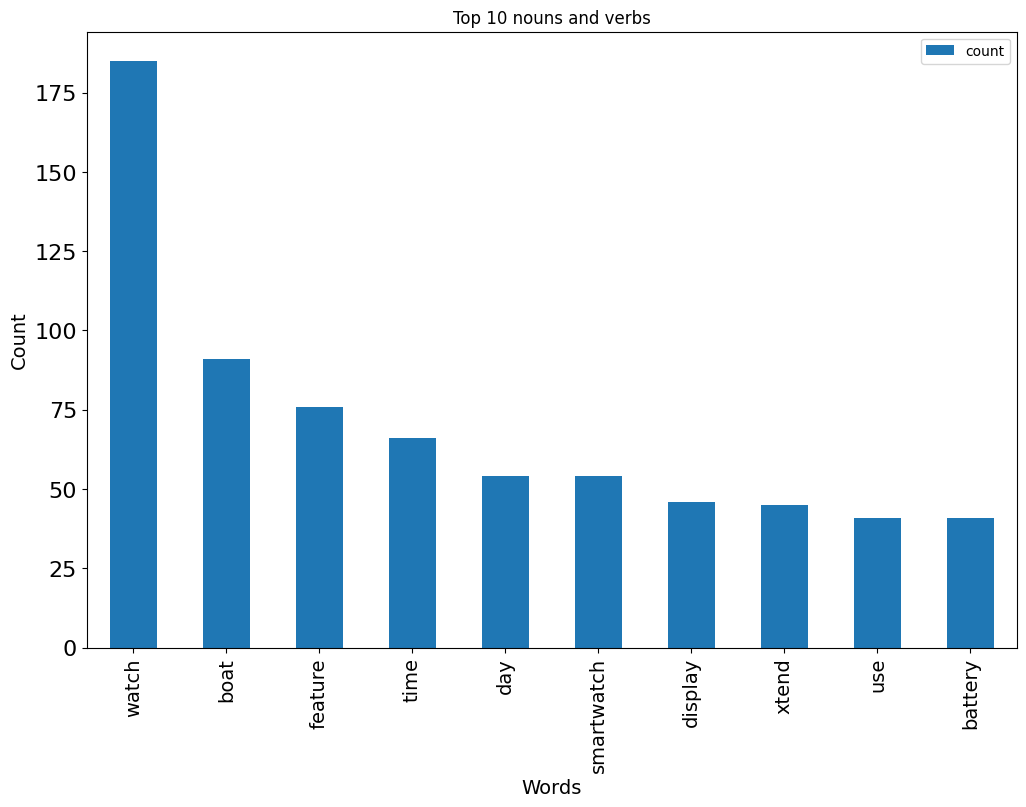

In [93]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Feature Extraction
A. BOW Features

In [94]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

B. TF-IDF Features

In [95]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments Using TextBlob

In [117]:
def sentiments_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

# Let's calculate subjectivity and Polarity

In [118]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   

                                   Uncleaned_Reviews  \
0  i using smart watch first time. model xtend bo...   
1  this smart (model boat extend plus) watch func...   
2  looks good... easy use. charging fast. charges...   
3         very good ,nice worth money, super product   
4  skipping parts mostly covered reviews sponsore...   

                                   Tokenized_Reviews  Subjectivity  Polarity  \
0  [using, smart, watch, first, time, model, xten...      0.625833  0.262560   
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452   
2  [look, good, easy, use, charging, fast, charge...      0.608333  0.320833   
3         [good, nice, worth, money, super, product]      0.591667  0.483333   
4  [skipping, part, mostly, covered, review, spon...      0.441033 -0.001266   

                                           sentiment  
0  <function sentiments_using_textblob at 0x7b699...  
1  <function sentiments_using_textblob at 0x7b699...  
2  <function sentiments_using_textblob at 0x7b699...  
3  <function sentiments_using_textblob at 0x7b699...  
4  <function sentiments_using_textblob at 0x7b699...

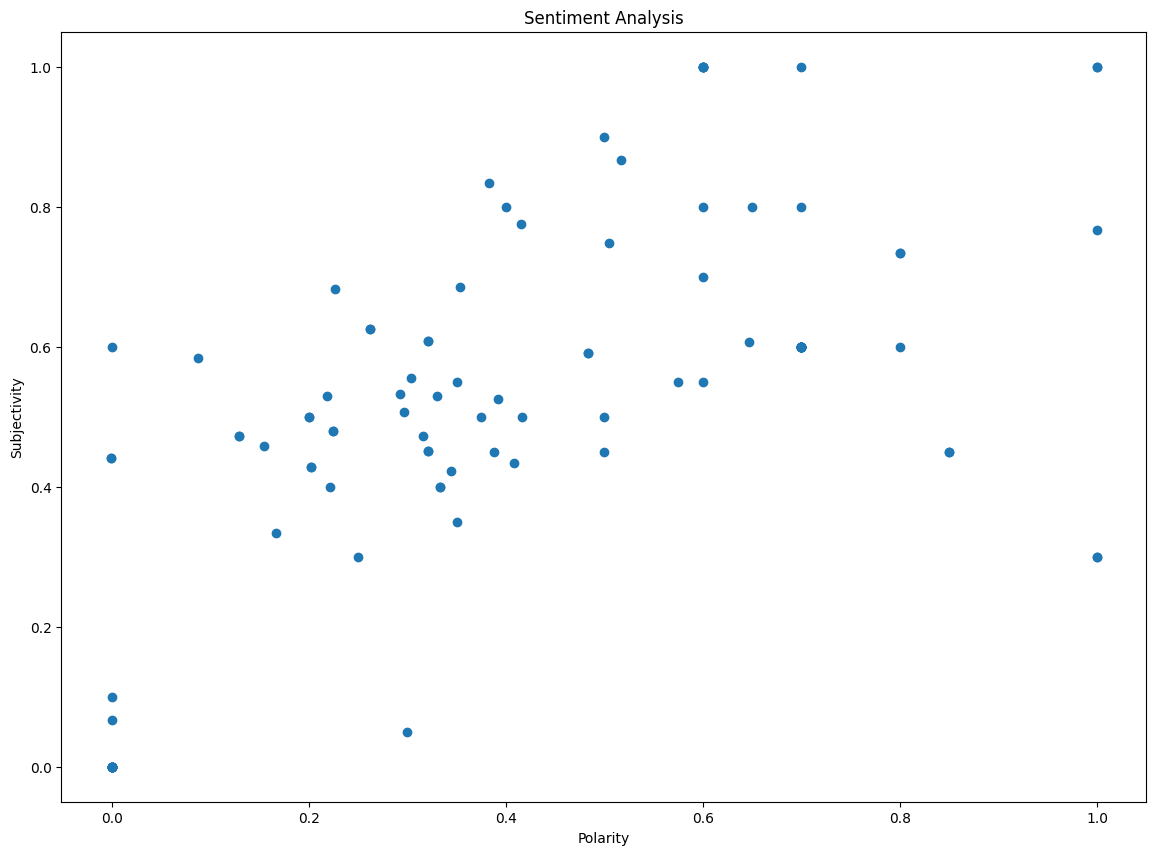

In [119]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [120]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  using smart watch first time model xtend boat ...   
1  smart model boat extend plus watch functioning...   
2  look good easy use charging fast charge stay l...   
3                good nice worth money super product   
4  skipping part mostly covered review sponsored ...   

                                   Uncleaned_Reviews  \
0  i using smart watch first time. model xtend bo...   
1  this smart (model boat extend plus) watch func...   
2  looks good... easy use. charging fast. charges...   
3         very good ,nice worth money, super product   
4  skipping parts mostly covered reviews sponsore...   

                                   Tokenized_Reviews  Subjectivity  Polarity  \
0  [using, smart, watch, first, time, model, xten...      0.625833  0.262560   
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452   
2  [look, good, easy, use, charging, fast, charge...      0.608333  0.320833   
3         [good, nice, worth, money, super, product]      0.591667  0.483333   
4  [skipping, part, mostly, covered, review, spon...      0.441033 -0.001266   

                                           sentiment  
0  <function sentiments_using_textblob at 0x7b699...  
1  <function sentiments_using_textblob at 0x7b699...  
2  <function sentiments_using_textblob at 0x7b699...  
3  <function sentiments_using_textblob at 0x7b699...  
4  <function sentiments_using_textblob at 0x7b699...

# Story Generation and Visualization

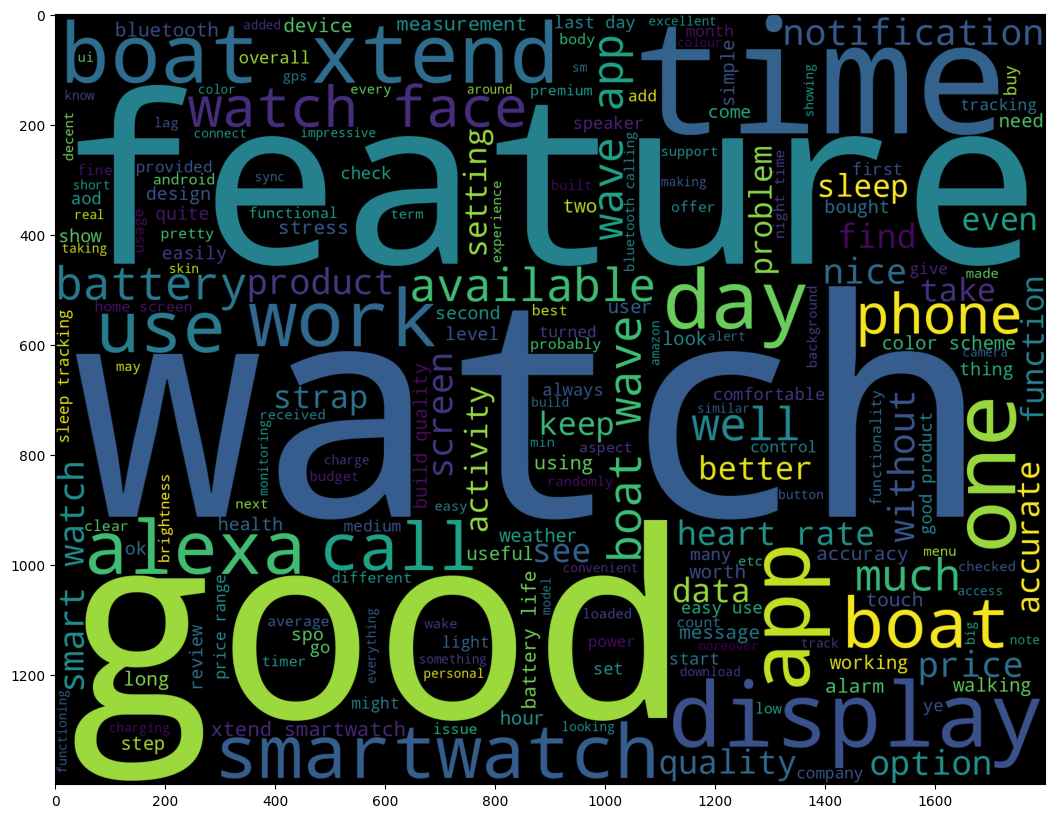

In [131]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

A. Most common words in positive Review

In [124]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

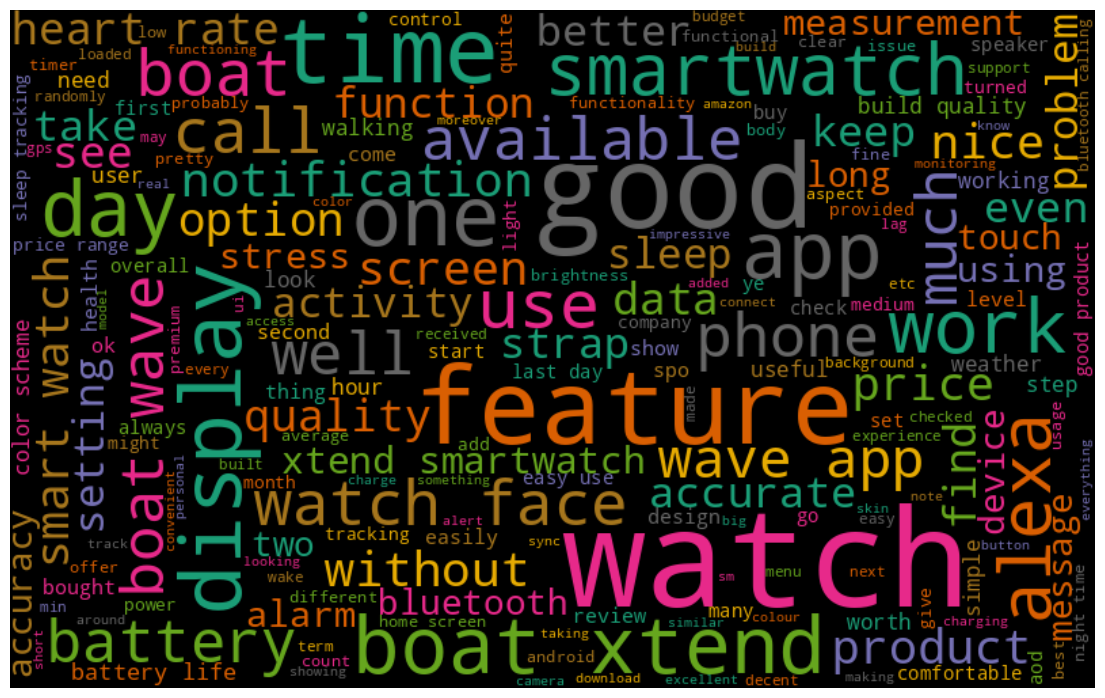

In [132]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(allWords_)

B. Most common words in negative Review

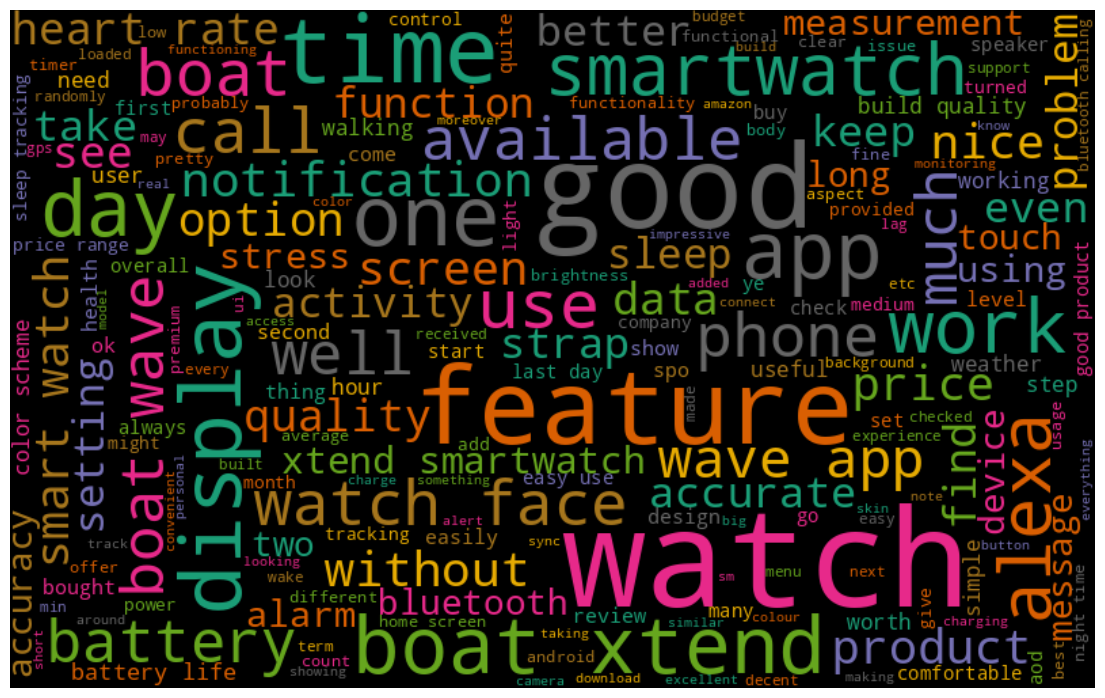

In [133]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(allWords_)

# The END !!!